In [234]:
import pandas as pd

# 1. Carregue o dataset e exiba as 10 primeiras linhas

In [ ]:
df = pd.read_csv('./data/household_power_consumption.txt', sep=";", low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


# 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.


---



A diferença é que Global_active_power representa a consumo real de energia da residência em certo horário, usado para acender luzes ou usar eletrodomésticos. Agora o Global_reactive_power é a energia necessária para manter campos elétricos/magnéticos de certos componentes eletrônicos de alguns tipos de equipamentos da casa, não realiza trabalho útil mas circula na rede.

# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.


In [235]:
df_datetime = df[['Date', 'Time']]
df_datetime.head()

,Date,Time
Datetime,,
2006-12-16 17:24:00,2006-12-16,17:24:00
2006-12-16 17:25:00,2006-12-16,17:25:00
2006-12-16 17:26:00,2006-12-16,17:26:00
2006-12-16 17:27:00,2006-12-16,17:27:00
2006-12-16 17:28:00,2006-12-16,17:28:00


In [236]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if col not in ['Date', 'Time']: # Exclude Date and Time columns from numeric conversion
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DayOfWeek              float64       
 10  is_weekend             bool          
 11  Total_Sub_metering     float64       
 12  month                  int32         
dtypes: bool(1), datetime64[ns](1), float64(9), int32(1), object(1)
memory usage: 199.9+ MB


In [238]:
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

Date                           0
Time                           0
Global_active_power        25979
Global_reactive_power      25979
Voltage                    25979
Global_intensity           25979
Sub_metering_1             25979
Sub_metering_2             25979
Sub_metering_3             25979
DayOfWeek                2075259
is_weekend                     0
Total_Sub_metering             0
month                          0
dtype: int64


In [239]:
#Escolhi uma coluna qualquer para quantificar
valores_faltantes = df['Voltage'].isnull().sum()
valores_faltantes_date = df['Date'].isnull().sum()

print(f'Existem', valores_faltantes, 'valores faltantes já nas colunas "Date" e "Time" existem:', valores_faltantes_date)

Existem 25979 valores faltantes já nas colunas "Date" e "Time" existem: 0


#4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente

In [240]:
df["Date"] = pd.to_datetime(df['Date'], format="%d/%m/%Y", errors="coerce")
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,is_weekend,Total_Sub_metering,month
Datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,NaN,True,18.0,12
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,NaN,True,17.0,12
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,NaN,True,19.0,12
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,NaN,True,18.0,12
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,NaN,True,18.0,12
2006-12-16 17:29:00,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,NaN,True,19.0,12
2006-12-16 17:30:00,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,NaN,True,18.0,12
2006-12-16 17:31:00,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,NaN,True,18.0,12
2006-12-16 17:32:00,2006-12-16,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,NaN,True,18.0,12


In [241]:
df["DayOfWeek"] = df["Date"].dt.day_name()
df[["Date","DayOfWeek"]].head(-10)

,Date,DayOfWeek
Datetime,,
2006-12-16 17:24:00,2006-12-16,Saturday
2006-12-16 17:25:00,2006-12-16,Saturday
2006-12-16 17:26:00,2006-12-16,Saturday
2006-12-16 17:27:00,2006-12-16,Saturday
2006-12-16 17:28:00,2006-12-16,Saturday
...,...,...
2010-11-26 20:48:00,2010-11-26,Friday
2010-11-26 20:49:00,2010-11-26,Friday
2010-11-26 20:50:00,2010-11-26,Friday


#5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [242]:
sample_2007 = df[df["Date"].dt.year == 2007].copy()
sample_2007['Global_active_power'] = pd.to_numeric(sample_2007['Global_active_power'], errors='coerce')

sample_2007 = sample_2007.set_index("Date")

mean_2007 = sample_2007["Global_active_power"].resample("D").mean()
display(mean_2007.head(10))

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
2007-01-06,1.047485
2007-01-07,1.699736
2007-01-08,1.556500
2007-01-09,1.297954


#6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

In [243]:
import matplotlib.pyplot as plt

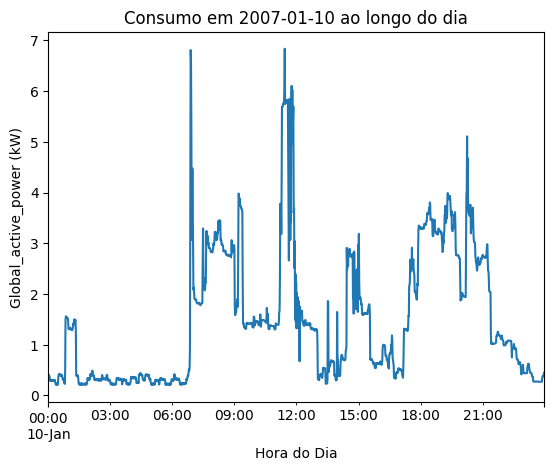

In [278]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')

df = df.set_index('Datetime')

one_day_data = df.loc['2007-01-10'].copy()

one_day_data['Global_active_power'].dropna().plot(title="Consumo em 2007-01-10 ao longo do dia")
plt.ylabel("Global_active_power (kW)")
plt.xlabel("Hora do Dia")
plt.show()

#7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


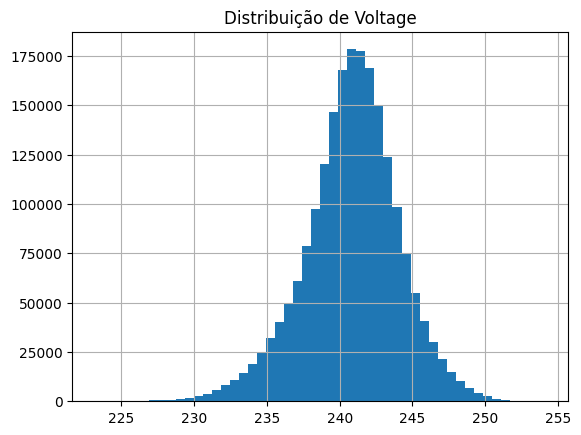

,Voltage
count,2.049280e+06
mean,2.408399e+02
std,3.239987e+00
min,2.232000e+02
25%,2.389900e+02
50%,2.410100e+02
75%,2.428900e+02
max,2.541500e+02


In [245]:
df["Voltage"].dropna().hist(bins=50)
plt.title("Distribuição de Voltage")
plt.show()
df["Voltage"].describe()

#8. Calcule o consumo médio por mês em todo o período disponível no dataset.


In [246]:
df['Global_active_power'].resample('ME').mean().head()

,Global_active_power
Datetime,
2006-12-31,1.901295
2007-01-31,1.546034
2007-02-28,1.401084
2007-03-31,1.318627
2007-04-30,0.891189


#9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).


In [247]:
d_sum = df["Global_active_power"].resample("D").sum(min_count=1)
d_sum.idxmax(), d_sum.max()
print(f"O dia com maior consumo foi:", d_sum.idxmax(), "com", d_sum.max(), "kW")

O dia com maior consumo foi: 2006-12-23 00:00:00 com 4773.386 kW


#10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana

In [248]:
df["is_weekend"] = df["Date"].dt.dayofweek >= 5
weekday = df.loc[~df["is_weekend"],"Global_active_power"].mean()
weekend = df.loc[df["is_weekend"],"Global_active_power"].mean()
print(f"Consumo médio do dia de semana:", weekday, ", consumo médio do fim de semana:", weekend)

Consumo médio do dia de semana: 1.0354720516747498 , consumo médio do fim de semana: 1.2342321767913047


# 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [249]:
df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


# 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [250]:
df["Total_Sub_metering"] = df[["Sub_metering_1","Sub_metering_2","Sub_metering_3"]].sum(axis=1)
df[["Sub_metering_1","Sub_metering_2","Sub_metering_3","Total_Sub_metering"]].head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Datetime,,,,
2006-12-16 17:24:00,0.0,1.0,17.0,18.0
2006-12-16 17:25:00,0.0,1.0,16.0,17.0
2006-12-16 17:26:00,0.0,2.0,17.0,19.0
2006-12-16 17:27:00,0.0,1.0,17.0,18.0
2006-12-16 17:28:00,0.0,1.0,17.0,18.0


# 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [277]:
threshold = df["Global_active_power"].mean()
monthly_total = df["Total_Sub_metering"].resample("ME").mean()
monthly_total[monthly_total > threshold]

,Total_Sub_metering
Datetime,
2006-12-31,10.871204
2007-01-31,10.423051
2007-02-28,9.485665
2007-03-31,10.212634
2007-04-30,6.249954
2007-05-31,8.452442
2007-06-30,7.371806
2007-07-31,5.681004
2007-08-31,6.975896


# 14. Faça um gráfico de série temporal do Voltage para o ano de 2008.


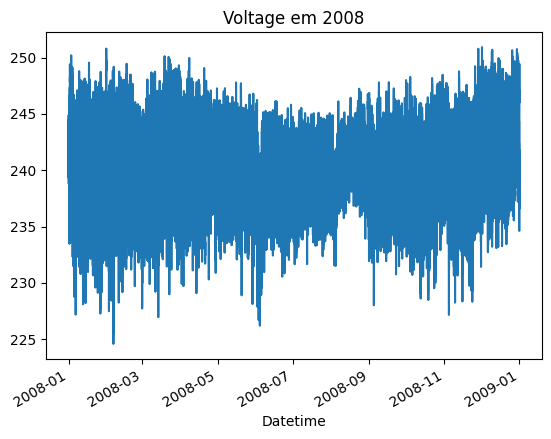

In [252]:
v2008 = df.loc["2008","Voltage"].dropna()
v2008.plot(title="Voltage em 2008")
plt.show()

# 15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).


In [276]:
df["month"] = df["Date"].dt.month
summer = df[df["month"].isin([6,7,8])]["Global_active_power"].mean()
winter = df[df["month"].isin([12,1,2])]["Global_active_power"].mean()
print(f"Consumo médio no verão:", summer, "|", "Consumo médio no inverno:", winter)

Consumo médio em verão: 0.7266815219278782 | Consumo médio em inverno: 1.4176230462106605


# 16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.


In [275]:
sample = df.sample(frac=0.01, random_state=42)

amostra = sample["Global_active_power"].mean()
populacao = df["Global_active_power"].mean()

amostra_std = sample["Global_active_power"].std()
populacao_std = df["Global_active_power"].std()


print(f"Média da amostra:", amostra, "|", "Média da população:", populacao)
print(f"Desvio padrão da amostra:", amostra_std, "|", "Desvio padrão da população:", populacao_std)

Média da amostra: 1.0974987796543982 | Média da população: 1.0916150365006245
Desvio padrão da amostra: 1.049284443500287 | Desvio padrão da população: 1.0572941610941602


# 17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.


In [255]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [256]:
num_cols = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Total_Sub_metering"]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[num_cols].dropna())
pd.DataFrame(scaled, columns=num_cols).head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.134328


# 18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.



In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [268]:
num_cols = ['Global_active_power','Global_reactive_power','Voltage',
            'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

# Agrega por dia (médias para potências/tensão, somas para sub-meterings)
daily = df[num_cols].resample('D').agg({
    'Global_active_power':'mean',
    'Global_reactive_power':'mean',
    'Voltage':'mean',
    'Global_intensity':'mean',
    'Sub_metering_1':'sum',
    'Sub_metering_2':'sum',
    'Sub_metering_3':'sum'
}).dropna()

# Escala e clusteriza
X_scaled = StandardScaler().fit_transform(daily)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
daily = daily.assign(cluster=labels)

# Perfil dos clusters (apenas numérico)
perfil = daily.groupby('cluster').mean(numeric_only=True)
print('Tamanho de cada cluster:', daily['cluster'].value_counts().to_dict())

Tamanho de cada cluster: {1: 601, 2: 494, 0: 338}


# 19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.



In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

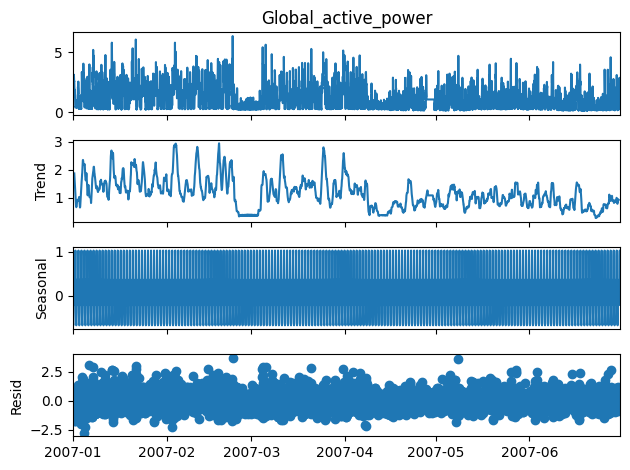

In [270]:
series = df[
    (df["Date"] >= "2007-01-01") & (df["Date"] <= "2007-06-30")
]["Global_active_power"].resample("h").mean().ffill()
result = seasonal_decompose(series, period=24)
result.plot()
plt.show()

# 20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.


In [271]:
from sklearn.metrics import mean_squared_error
import numpy as np

df1 = df[["Global_active_power","Global_intensity"]].dropna()
X = df1[["Global_intensity"]]
y = df1["Global_active_power"]
lr = LinearRegression().fit(X,y)
pred = lr.predict(X)
rmse = np.sqrt(mean_squared_error(y,pred))

print(f"Modelo de Regressão Linear:")
print(f"Coeficiente (Global_intensity): {lr.coef_[0]:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print(f"RMSE: {rmse:.4f}")

Modelo de Regressão Linear:
Coeficiente (Global_intensity): 0.2376
Intercept: -0.0081
RMSE: 0.0498


# 21) Reamostra para 1 hora e identifica horários de maior consumo médio


Maiores consumos médios por hora do dia:


,mean_GAP
Datetime,
20,1.899073
21,1.876063
19,1.733428
7,1.502373
8,1.460940


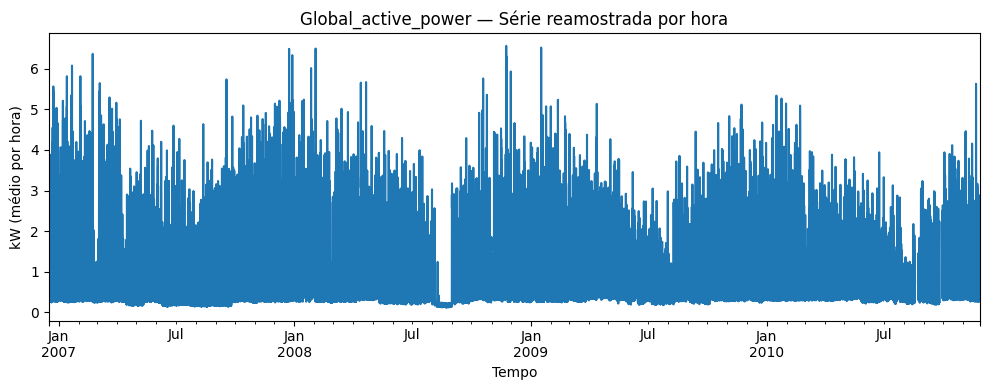

In [280]:
hourly = df['Global_active_power'].resample('1h').mean()

by_hour = hourly.groupby(hourly.index.hour).mean().rename("mean_GAP")
top_hours = by_hour.sort_values(ascending=False).head(5)
print("Maiores consumos médios por hora do dia:")
display(top_hours)

plt.figure(figsize=(10,4))
hourly.plot()
plt.title("Global_active_power — Série reamostrada por hora")
plt.xlabel("Tempo"); plt.ylabel("kW (médio por hora)")
plt.tight_layout(); plt.show()


# 22) Autocorrelação


Autocorrelação 1h:  0.7133
Autocorrelação 24h: 0.4352
Autocorrelação 48h: 0.3990


<Figure size 800x400 with 0 Axes>

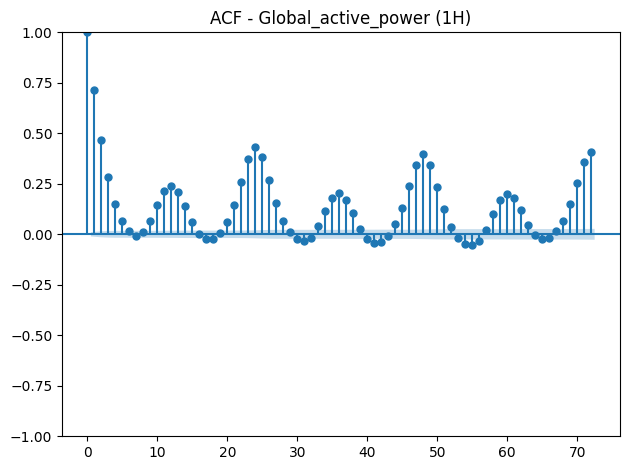

Padrão diário fraco ou ausente com base nesses lags.


In [282]:
series = df['Global_active_power'].resample('1h').mean().dropna()

ac_1h  = series.autocorr(lag=1)
ac_24h = series.autocorr(lag=24)
ac_48h = series.autocorr(lag=48)

print(f"Autocorrelação 1h:  {ac_1h:.4f}")
print(f"Autocorrelação 24h: {ac_24h:.4f}")
print(f"Autocorrelação 48h: {ac_48h:.4f}")

# Opcional: ACF com statsmodels (se disponível)
try:
    from statsmodels.graphics.tsaplots import plot_acf
    plt.figure(figsize=(8,4))
    plot_acf(series, lags=72)
    plt.title("ACF - Global_active_power (1H)")
    plt.tight_layout(); plt.show()
except Exception as e:
    print("ACF opcional não gerado (statsmodels indisponível ou outro motivo):", e)

if ac_24h > max(ac_1h, ac_48h) and ac_24h > 0.2:
    print("Indício de padrão diário (24h) presente.")
else:
    print("Padrão diário fraco ou ausente com base nesses lags.")


#23. Redução de dimensionalidade com PCA

In [283]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Variância explicada por componente: [0.60857094 0.22433556]
Variância explicada acumulada: 0.8329064933533887


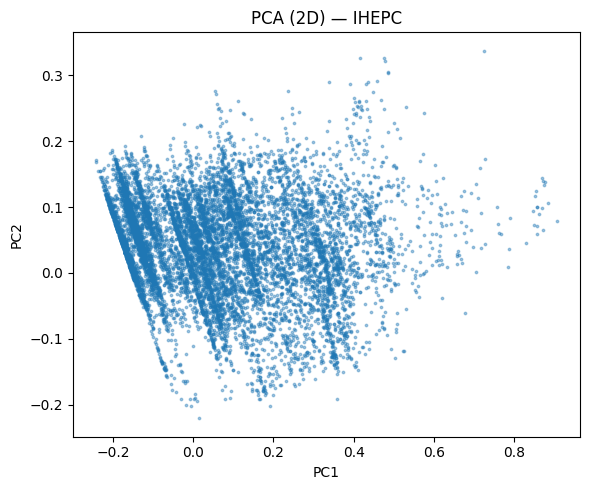

In [285]:
features = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
X = df[features].dropna()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância explicada acumulada:", pca.explained_variance_ratio_.sum())

nplot = min(10000, X_pca.shape[0])
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:nplot,0], X_pca[:nplot,1], s=3, alpha=0.4)
plt.title("PCA (2D) — IHEPC")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()


#24. Visualização de clusters no espaço PCA

In [286]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

Tamanho dos clusters: Counter({np.int32(1): 1088838, np.int32(0): 755035, np.int32(2): 205407})


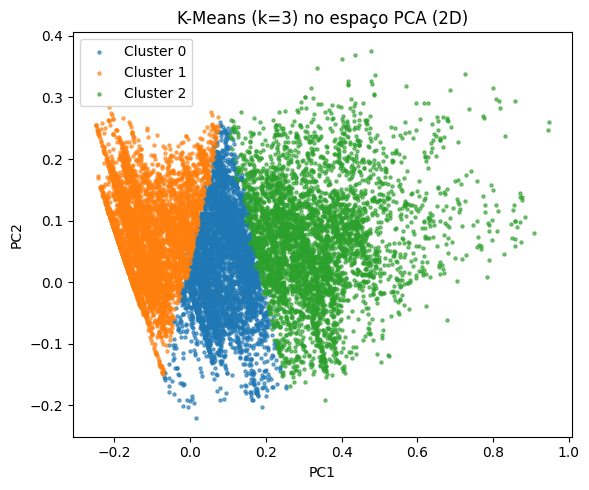

In [287]:
try:
    X_scaled
except NameError:
    features = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
    X = df[features].dropna()
    X_scaled = MinMaxScaler().fit_transform(X)

# PCA 2D (se não existir)
try:
    X_pca
except NameError:
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
print("Tamanho dos clusters:", Counter(labels))

nplot = min(15000, X_pca.shape[0])
plt.figure(figsize=(6,5))
for lab in np.unique(labels[:nplot]):
    idx = np.where(labels[:nplot] == lab)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], s=5, alpha=0.6, label=f"Cluster {lab}")
plt.title("K-Means (k=3) no espaço PCA (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout(); plt.show()


#25. Regressão polinomial vs linear

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

RMSE Linear: 0.9745
RMSE Polinomial (grau 2): 0.9708


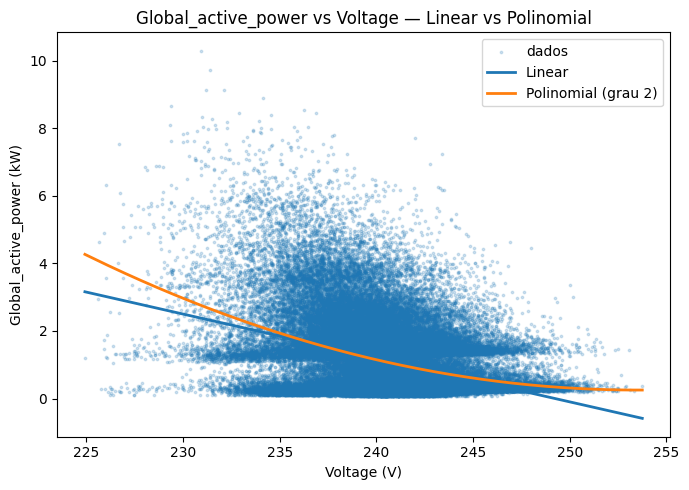

In [290]:
data_lr = df[['Global_active_power','Voltage']].dropna().copy()

# amostra para desempenho
N = 100_000
if len(data_lr) > N:
    data_lr = data_lr.sample(N, random_state=42).sort_index()

X = data_lr[['Voltage']].values
y = data_lr['Global_active_power'].values

# Linear
lin = LinearRegression().fit(X, y)
y_hat_lin = lin.predict(X)
rmse_lin = sqrt(mean_squared_error(y, y_hat_lin))

# Polinomial (grau 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
lin2 = LinearRegression().fit(X_poly, y)
y_hat_poly = lin2.predict(X_poly)
rmse_poly = sqrt(mean_squared_error(y, y_hat_poly))

print(f"RMSE Linear: {rmse_lin:.4f}")
print(f"RMSE Polinomial (grau 2): {rmse_poly:.4f}")

order = np.argsort(X.flatten())
X_sorted = X[order]
y_lin_sorted = y_hat_lin[order]
y_poly_sorted = lin2.predict(poly.transform(X_sorted))

plt.figure(figsize=(7,5))
plt.scatter(X, y, s=3, alpha=0.2, label="dados")
plt.plot(X_sorted, y_lin_sorted, label="Linear", linewidth=2)
plt.plot(X_sorted, y_poly_sorted, label="Polinomial (grau 2)", linewidth=2)
plt.title("Global_active_power vs Voltage — Linear vs Polinomial")
plt.xlabel("Voltage (V)"); plt.ylabel("Global_active_power (kW)")
plt.legend()
plt.tight_layout(); plt.show()

# ===== PARTE 3 — APPLIANCES ENERGY PREDICTION =====

# 26) Carregar e inspecionar

In [299]:
df = pd.read_csv("/content/energydata_complete.csv")

In [294]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').set_index('date')

print("Shape:", df.shape)
print("Colunas:", list(df.columns)[:15])
print("\nTipos numéricos (amostra):")
print(df.select_dtypes(include='number').dtypes.head())

print("\nEstatísticas (numérico):")
print(df.describe().T.head(12))


Shape: (2075259, 12)
Colunas: ['Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'DayOfWeek', 'is_weekend', 'Total_Sub_metering', 'month']

Tipos numéricos (amostra):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
dtype: object

Estatísticas (numérico):
                           count        mean        std      min      25%  \
Global_active_power    2049280.0    1.091615   1.057294    0.076    0.308   
Global_reactive_power  2049280.0    0.123714   0.112722    0.000    0.048   
Voltage                2049280.0  240.839858   3.239987  223.200  238.990   
Global_intensity       2049280.0    4.627759   4.444396    0.200    1.400   
Sub_metering_1         2049280.0    1.121923   6.153031    0.000    0.000   
Sub_metering_2         2049280.0    1.298520   5.822026    0.000    0.000  

#27. Distribuição do consumo




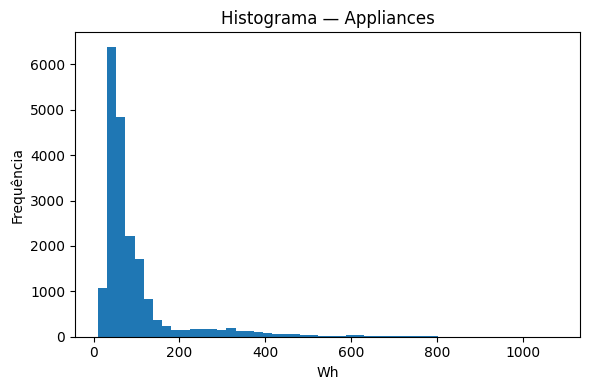

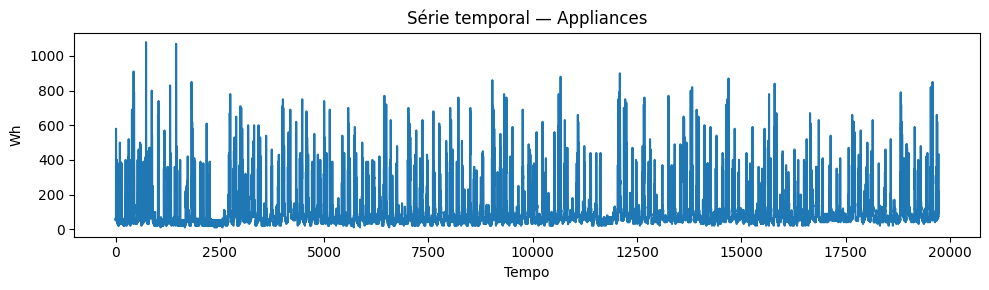

In [300]:
df['Appliances'].dropna().plot(kind='hist', bins=50, figsize=(6,4))
plt.title('Histograma — Appliances'); plt.xlabel('Wh'); plt.ylabel('Frequência')
plt.tight_layout(); plt.show()

# Série temporal
df['Appliances'].plot(figsize=(10,3))
plt.title('Série temporal — Appliances'); plt.xlabel('Tempo'); plt.ylabel('Wh')
plt.tight_layout(); plt.show()

#28. Correlações com variáveis ambientais

In [301]:
num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr()['Appliances'].sort_values(ascending=False)

print("Top correlações com Appliances:")
print(corr.head(12))
print("\nMaiores em valor absoluto:")
print(corr.abs().sort_values(ascending=False).head(12))


Top correlações com Appliances:
Appliances    1.000000
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
Name: Appliances, dtype: float64

Maiores em valor absoluto:
Appliances    1.000000
lights        0.197278
RH_out        0.152282
T2            0.120073
T6            0.117638
T_out         0.099155
RH_8          0.094039
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
RH_6          0.083178
RH_2          0.060465
Name: Appliances, dtype: float64


#29. Normalização dos dados


In [302]:
scaler = MinMaxScaler()
num_cols_all = df.select_dtypes(include='number').columns
scaled = pd.DataFrame(scaler.fit_transform(df[num_cols_all]),
                      columns=num_cols_all, index=df.index)
print("Scaled shape:", scaled.shape)


Scaled shape: (19735, 28)


#30. PCA


Variância explicada: [0.36426881 0.21103941] | soma: 0.5753082282520616


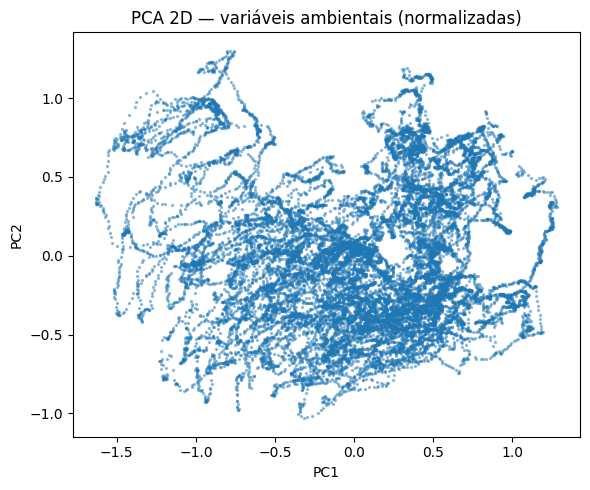

In [308]:
X_pca_in = scaled.drop(columns=['Appliances'], errors='ignore').dropna()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_pca_in)

print("Variância explicada:", pca.explained_variance_ratio_,
      "| soma:", float(pca.explained_variance_ratio_.sum()))

n = min(20000, len(X_pca))
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:n,0], X_pca[:n,1], s=2, alpha=0.4)
plt.title('PCA 2D — variáveis ambientais (normalizadas)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout(); plt.show()


#31. Regressão Linear Múltipla


In [310]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split


In [311]:
# features numéricas exceto a target
features = [c for c in df.select_dtypes(include='number').columns if c != 'Appliances']
X = df[features].values
y = df['Appliances'].values

# split temporal (sem embaralhar)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, shuffle=False)

lin = LinearRegression().fit(X_tr, y_tr)
pred = lin.predict(X_te)

rmse = sqrt(mean_squared_error(y_te, pred))
print({"R2": r2_score(y_te, pred), "RMSE": rmse})



{'R2': 0.09242341295506185, 'RMSE': 86.7295071318957}


# 32) Random Forest Regressor — AUTOSSUFICIENTE


In [318]:
import os, numpy as np
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [324]:
try:
    df
except NameError:
    DATA_PATH = "/content/energydata_complete.csv"
    assert os.path.exists(DATA_PATH), f"Arquivo não encontrado: {DATA_PATH}"
    df = pd.read_csv(DATA_PATH)
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df = df.sort_values("date").set_index("date")

features = [c for c in df.select_dtypes(include="number").columns if c != "Appliances"]
X = df[features].values
y = df["Appliances"].values

# split temporal
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, shuffle=False)

# modelo
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)
pred_rf = rf.predict(X_te)

rmse_rf = sqrt(mean_squared_error(y_te, pred_rf))  # compatível com versões antigas
r2_rf = r2_score(y_te, pred_rf)
print({"RMSE_RF": rmse_rf, "R2_RF": r2_rf})

# importâncias
imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False).head(10)
print("\nImportâncias (top 10):")
print(imp)

{'RMSE_RF': 231.00561815439642, 'R2_RF': -5.438646941104195}

Importâncias (top 10):
T3             0.065734
lights         0.056010
RH_3           0.052207
RH_8           0.051258
RH_2           0.049779
RH_out         0.048358
RH_5           0.047748
Press_mm_hg    0.047406
RH_1           0.046673
RH_6           0.041510
dtype: float64


# 33) K-Means (3–5) + consumo médio por cluster


In [320]:
# Normaliza todas as numéricas (sem 'Appliances') para clusterização
num_cols = df.select_dtypes(include='number').columns.tolist()
Xm = df[num_cols].drop(columns=['Appliances'], errors='ignore')
Xm = Xm.copy()

# Remove linhas com NaN e mantém índice para alinhar com 'df'
mask = Xm.dropna().index
Xm = Xm.loc[mask]

scaler_km = MinMaxScaler()
Xm_scaled = pd.DataFrame(scaler_km.fit_transform(Xm), columns=Xm.columns, index=Xm.index)

for k in [3, 4, 5]:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(Xm_scaled.values)
    sizes = {i: int((labels == i).sum()) for i in range(k)}
    print(f"\nK={k} — tamanhos:", sizes)

    # Consumo médio (Appliances) por cluster no espaço original
    cl_df = pd.DataFrame({"cluster": labels}, index=Xm_scaled.index)
    prof_cons = df[['Appliances']].join(cl_df).dropna().groupby('cluster')['Appliances'].mean()
    print("Appliances médio (Wh) por cluster:\n", prof_cons)

    # (Opcional) centroides normalizados:
    # print("Centroides (normalizados):\n", pd.DataFrame(km.cluster_centers_, columns=Xm_scaled.columns))



K=3 — tamanhos: {0: 8868, 1: 6132, 2: 4735}
Appliances médio (Wh) por cluster:
 cluster
0     91.200947
1    107.888128
2     96.656811
Name: Appliances, dtype: float64

K=4 — tamanhos: {0: 5260, 1: 5207, 2: 5201, 3: 4067}
Appliances médio (Wh) por cluster:
 cluster
0    108.319392
1     94.278855
2     92.870602
3     94.497172
Name: Appliances, dtype: float64

K=5 — tamanhos: {0: 4772, 1: 2650, 2: 4758, 3: 3697, 4: 3858}
Appliances médio (Wh) por cluster:
 cluster
0     90.867561
1    101.720755
2     90.483396
3     94.552340
4    115.279938
Name: Appliances, dtype: float64


# 34) Binário via mediana de 'Appliances' + LR e RF

In [321]:
# 34) Binário via mediana de 'Appliances' + LR e RF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

median_appl = df['Appliances'].median()
ybin = (df['Appliances'] > median_appl).astype(int)

Xbin = df.select_dtypes(include='number').drop(columns=['Appliances'])
data_bin = pd.concat([Xbin, ybin.rename('y')], axis=1).dropna()
Xbin = data_bin.drop(columns=['y'])
ybin = data_bin['y']

Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(Xbin, ybin, test_size=0.2, shuffle=False)

logr = LogisticRegression(max_iter=500, solver='liblinear')
logr.fit(Xb_tr, yb_tr)
pred_lr = logr.predict(Xb_te)

rf_clf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_clf.fit(Xb_tr, yb_tr)
pred_rf = rf_clf.predict(Xb_te)

print("Modelos treinados.")


Modelos treinados.


# 35) Avaliação — usa yb_te, pred_lr, pred_rf da célula 34


In [322]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [323]:
def avaliar(y_true, y_pred, nome):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{nome} -> acc:{acc:.3f}  prec:{prec:.3f}  rec:{rec:.3f}  f1:{f1:.3f}")
    print("Matriz de confusão:\n", cm)
    tn, fp, fn, tp = cm.ravel()
    if fp > fn:
        print("Erra mais classificando 'alto' quando era 'baixo' (FP).")
    elif fn > fp:
        print("Erra mais classificando 'baixo' quando era 'alto' (FN).")
    else:
        print("FP e FN empatados.")

avaliar(yb_te, pred_lr, "Logistic Regression")
avaliar(yb_te, pred_rf, "Random Forest")



Logistic Regression -> acc:0.755  prec:0.738  rec:0.784  f1:0.761
Matriz de confusão:
 [[1446  544]
 [ 422 1535]]
Erra mais classificando 'alto' quando era 'baixo' (FP).

Random Forest -> acc:0.548  prec:0.525  rec:0.946  f1:0.675
Matriz de confusão:
 [[ 312 1678]
 [ 105 1852]]
Erra mais classificando 'alto' quando era 'baixo' (FP).
